# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,average_precision_score,cohen_kappa_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,precision_recall_curve
import _pickle as cPickle
from sklearn.model_selection import train_test_split 
plt.style.use('fivethirtyeight')

In [2]:
path='./data/creditcard.csv'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
drop_list = ['Time','V13','V15','V22','V26','V25','V23']
data = data.drop(drop_list,axis=1)

## Applying Standardization 

In [7]:
from sklearn.preprocessing import StandardScaler
data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [9]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V24,V27,V28,Class,scaled_Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,4.458112e-15,-3.660161e-16,-1.206049e-16,0.001727,3.202236e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,6.056471e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-2.836627e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-3.545861e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,4.097606e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,4.395266e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,4.584549e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [10]:
scores={}

### Print Score Function

In [11]:
def addValues(model_name,y_test,y_pred,y_prob):
    precision,recall,_ = precision_recall_curve(y_test,y_prob[:,1])
    scores.update({model_name : {
        'precision_score' : precision_score(y_test,y_pred),
        'recall_score' : recall_score(y_test,y_pred),
        'f1_score' : f1_score(y_test,y_pred),
        'AUC_score': auc(recall,precision),
        'ROC_AUC_score': roc_auc_score(y_test, y_prob[:,1]),
        'kappa': cohen_kappa_score(y_test,y_pred)
    }})

## Undersampling data and preparing it to be trainable

In [12]:
df=data

In [13]:
fraud_ind = np.array(df[df.Class == 1].index)
gen_ind = df[df.Class == 0].index
n_fraud = len(df[df.Class == 1])
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['Class'].values #target
X_undersample = undersample_df.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_df))
print("% genuine transactions: ",len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  984
% genuine transactions:  0.5
% fraud transactions:  0.5


In [16]:
def split_data(df,drop_list):
    df=df.drop(drop_list,axis=1)
    X=df[df['Class']==1]
    Y=df[df['Class']==0]
    X=df.drop(['Class'], axis = 1) 
    Y=df["Class"] 
    xData = X.values 
    yData = Y.values 
    xTrain, xTest, yTrain, yTest = train_test_split( 
            xData, yData, test_size = 0.2, random_state = 42)
    return xTrain, xTest, yTrain, yTest

In [17]:
x_Train,x_Test,y_Train,y_Test=split_data(undersample_df,[])

## Naive Bayes Algorithm

**p(A/B) = p(B/A)*p(A) / p(B)**

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
NBclf=GaussianNB()

In [21]:
NBclf.fit(x_Train,y_Train)

GaussianNB()

In [22]:
NB_pred,NB_pred_prob=NBclf.predict(x_Test),NBclf.predict_proba(x_Test)

In [23]:
NB_precision,NB_recall,_ = precision_recall_curve(y_Test,NB_pred_prob[:,1])

In [24]:
addValues('Naive Bayes',y_Test,NB_pred,NB_pred_prob)

In [25]:
scores['Naive Bayes']

{'precision_score': 0.9883720930232558,
 'recall_score': 0.8585858585858586,
 'f1_score': 0.9189189189189189,
 'AUC_score': 0.9769493901245778,
 'ROC_AUC_score': 0.9684601113172542,
 'kappa': 0.8478137714374002}

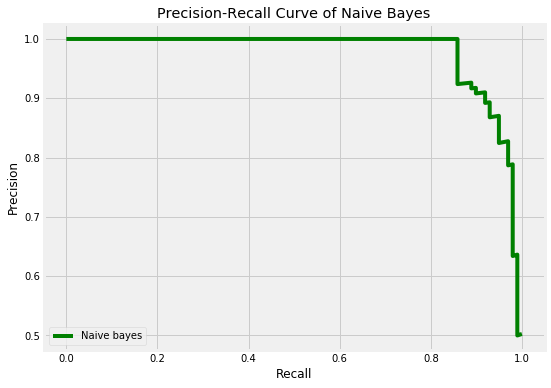

In [26]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Naive Bayes')
plt.plot(NB_recall, NB_precision, label='Naive bayes',color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(C = 0.01, penalty = 'l2',max_iter=1000)

In [29]:
lr.fit(x_Train, y_Train)

LogisticRegression(C=0.01, max_iter=1000)

In [30]:
lr_pred,lr_prob=lr.predict(x_Test),lr.predict_proba(x_Test)

In [31]:
lr_precision,lr_recall,_ = precision_recall_curve(y_Test,lr_prob[:,1])

In [32]:
addValues("Logistic Regression",y_Test,lr_pred,lr_prob)

In [33]:
scores['Logistic Regression']

{'precision_score': 0.9777777777777777,
 'recall_score': 0.8888888888888888,
 'f1_score': 0.931216931216931,
 'AUC_score': 0.9900618395196986,
 'ROC_AUC_score': 0.9885590599876314,
 'kappa': 0.868078092000206}

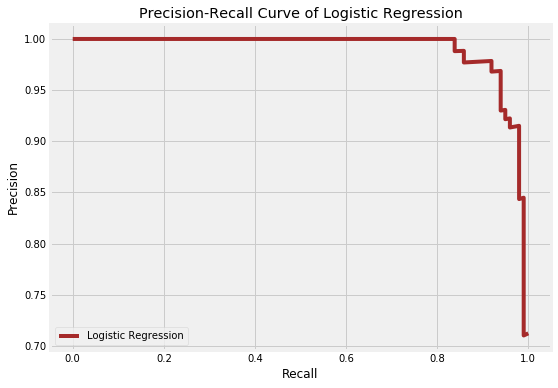

In [34]:
plt.figure(figsize=(8,6))
plt.plot(lr_recall, lr_precision, label='Logistic Regression',color='brown')
plt.title('Precision-Recall Curve of Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Linear Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
lda_clf=LinearDiscriminantAnalysis()

In [37]:
lda_clf.fit(x_Train,y_Train)

LinearDiscriminantAnalysis()

In [38]:
lda_pred, lda_prob = lda_clf.predict(x_Test),lda_clf.predict_proba(x_Test)

In [39]:
lda_precision,lda_recall,_ = precision_recall_curve(y_Test,lda_prob[:,1])

In [40]:
addValues("Linear Discriminant Analysis",y_Test,lda_pred,lda_prob)

In [41]:
scores['Linear Discriminant Analysis']

{'precision_score': 0.9879518072289156,
 'recall_score': 0.8282828282828283,
 'f1_score': 0.9010989010989011,
 'AUC_score': 0.9773131930317791,
 'ROC_AUC_score': 0.9677386105957534,
 'kappa': 0.81740473738414}

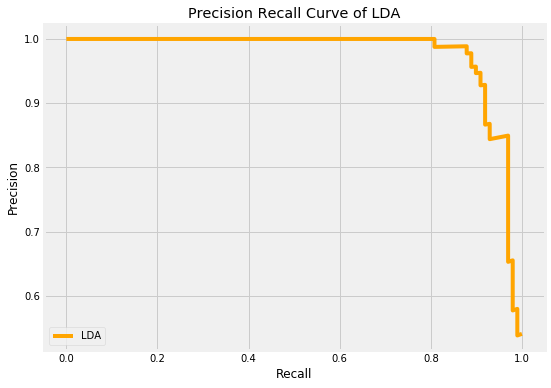

In [42]:
plt.figure(figsize=(8,6))
plt.plot(lda_recall, lda_precision, label='LDA',color='orange')
plt.title('Precision Recall Curve of LDA')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
Dtree = DecisionTreeClassifier()

In [62]:
Dtree.fit(x_Train,y_Train)

DecisionTreeClassifier()

In [63]:
with open('Undersampled/DecisionTree.pkl', 'wb') as fid:
    cPickle.dump(Dtree, fid)

In [45]:
with open('Undersampled/DecisionTree.pkl', 'rb') as fid:
    DT = cPickle.load(fid)

In [46]:
DT_preds,DT_probs = DT.predict(x_Test),DT.predict_proba(x_Test)

In [47]:
DT_precision,DT_recall,_ = precision_recall_curve(y_Test,DT_probs[:,1])

In [48]:
addValues("Decision Tree",y_Test,DT_preds,DT_probs)

In [49]:
scores['Decision Tree']

{'precision_score': 0.8715596330275229,
 'recall_score': 0.9595959595959596,
 'f1_score': 0.9134615384615384,
 'AUC_score': 0.9257300805757005,
 'ROC_AUC_score': 0.9083694083694085,
 'kappa': 0.8171599463751675}

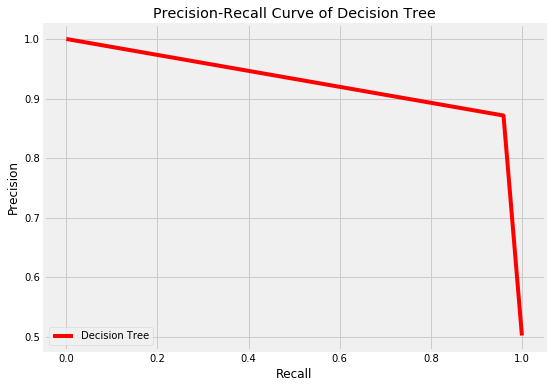

In [50]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Decision Tree')
plt.plot(DT_recall, DT_precision, label='Decision Tree',color='Red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

### Random Forest

### Applying Ensemble techniques

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RF_clf = RandomForestClassifier()

In [53]:
RF_clf.fit(x_Train, y_Train)

RandomForestClassifier()

In [75]:
with open('Undersampled/RandomForest.pkl', 'wb') as fid:
    cPickle.dump(RF_clf, fid)

In [54]:
with open('Undersampled/RandomForest.pkl', 'rb') as fid:
    RF_clf = cPickle.load(fid)

In [55]:
RF_pred,RF_prob = RF_clf.predict(x_Test),RF_clf.predict_proba(x_Test)

In [56]:
RF_precision,RF_recall,_ = precision_recall_curve(y_Test,RF_prob[:,1])

In [57]:
addValues("Random Forest Classifier",y_Test,RF_pred,RF_prob)

In [58]:
scores['Random Forest Classifier']

{'precision_score': 0.9591836734693877,
 'recall_score': 0.9494949494949495,
 'f1_score': 0.9543147208121828,
 'AUC_score': 0.990126156308061,
 'ROC_AUC_score': 0.9874768089053804,
 'kappa': 0.9086317959288843}

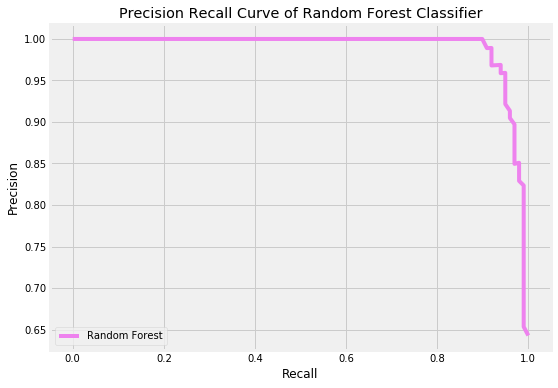

In [59]:
plt.figure(figsize=(8,6))
plt.title('Precision Recall Curve of Random Forest Classifier')
plt.plot(RF_recall, RF_precision, label='Random Forest',color='violet')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


### Support Vector Machine

In [60]:
from sklearn.svm import SVC

In [61]:
clf = SVC(probability=True)

In [89]:
clf.fit(x_Train, y_Train)

SVC(probability=True)

In [90]:
with open('Undersampled/SVM.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)

In [62]:
with open('Undersampled/SVM.pkl', 'rb') as fid:
    SVMclf = cPickle.load(fid)

In [63]:
SVM_pred,SVM_prob=SVMclf.predict(x_Test),SVMclf.predict_proba(x_Test)

In [64]:
SVM_precision,SVM_recall,_ = precision_recall_curve(y_Test,SVM_prob[:,1])

In [65]:
addValues("SVM",y_Test,SVM_pred,SVM_prob)

In [66]:
scores['SVM']

{'precision_score': 0.9772727272727273,
 'recall_score': 0.8686868686868687,
 'f1_score': 0.9197860962566845,
 'AUC_score': 0.9918725980887977,
 'ROC_AUC_score': 0.9914450628736344,
 'kappa': 0.8477980942570178}

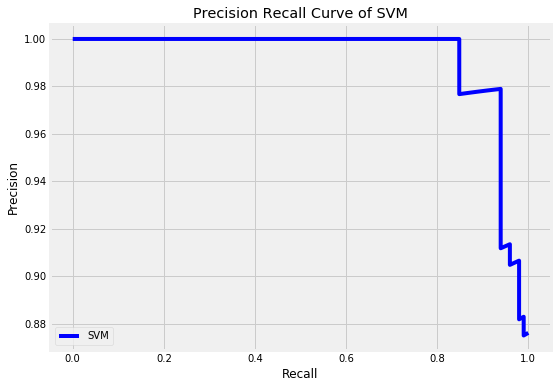

In [67]:
plt.figure(figsize=(8,6))
plt.plot(SVM_recall, SVM_precision, label='SVM',color='blue')
plt.title('Precision Recall Curve of SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## DNN

In [68]:
import keras
from keras import layers
from keras.models import load_model

In [69]:
model = keras.Sequential([
layers.Dense(input_dim = 23,units= 23, activation = 'relu'),
layers.Dense(units = 20,activation = 'relu'),

layers.Dropout(0.5),

layers.Dense(units = 16,activation = 'relu'),

layers.Dense(units =1, activation = 'sigmoid'),])

In [246]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_Train, y_Train, batch_size = 16, epochs = 20)

Epoch 1/20
50/50 [==============================] - 1s 14ms/step - loss: 0.6101 - accuracy: 0.5870
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7497
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8564
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8907
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.9060
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.9187
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9250
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9225
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9352
Epoch 10/20
50/50 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.9339
Epoch 11/20
50/50 

In [250]:
model.save('Undersampled/first.h5')

In [70]:
model = load_model('Undersampled/first.h5')

In [71]:
Dnn_preds,Dnn_prob= model.predict(x_Test),model.predict_proba(x_Test)

Instructions for updating:
Please use `model.predict()` instead.


In [72]:
DNN_precision,DNN_recall,_ = precision_recall_curve(y_Test,Dnn_prob)

scores.update({'DNN' : {
        'precision_score' : precision_score(y_Test,Dnn_preds.round()),
        'recall_score' : recall_score(y_Test,Dnn_preds.round()),
        'f1_score' : f1_score(y_Test,Dnn_preds.round()),
        'AUC_score': auc(DNN_recall,DNN_precision),
        'ROC_AUC_score': roc_auc_score(y_Test, Dnn_prob),
        'kappa': cohen_kappa_score(y_Test,Dnn_preds.round())
    }})

In [73]:
scores['DNN']

{'precision_score': 0.9693877551020408,
 'recall_score': 0.9595959595959596,
 'f1_score': 0.964467005076142,
 'AUC_score': 0.9911779300491417,
 'ROC_AUC_score': 0.9885590599876315,
 'kappa': 0.9289358412780211}

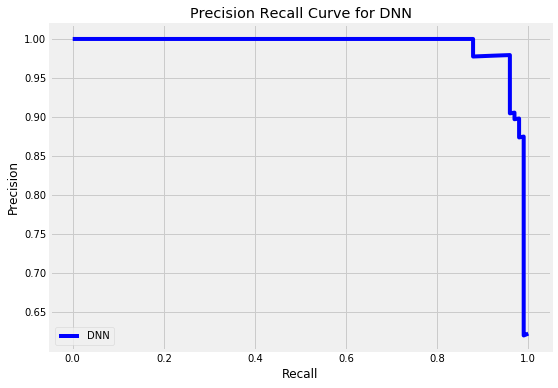

In [74]:
plt.figure(figsize=(8,6))
plt.plot(DNN_recall, DNN_precision, label='DNN',color='blue')
plt.title('Precision Recall Curve for DNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

## Conclusion

**After applying undersampling technique we are getting relatively good performance in all algorithms.**

**Random Forest is still leading in performance with other algorithms.**